In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from pi_py_darknet.darknet import initialize, detect
import cv2
from IPython.display import Image, display

In [3]:
from picamera import PiCamera
import time

In [4]:
net, meta = initialize()

Initializing Darknet
--Done!


In [5]:
camera = PiCamera()
camera.rotation = 180
camera.resolution = (640, 480)
time.sleep(2)

In [6]:
def detect_people(img_filename):
#     results = darknet.detect(net, meta, b"foo.jpg")
    results = detect(net, meta, bytes(img_filename, 'utf-8'))
    
    people = []
    
    for cat, score, bounds in results:
        if cat == 'person':
            people.append((cat, score, bounds))
            
    return people



In [7]:
%load_ext line_profiler

In [8]:
def predict(img_filename):
    camera.capture(img_filename)

    img = cv2.imread(img_filename)

    people = detect_people(img_filename)

    for cat, score, bounds in people:
        x, y, w, h = bounds
        print(x, y, w, h)

        cv2.rectangle(img, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (255, 0, 0), thickness=2)
        cv2.circle(img, (x, y))
        label = '{}:{:06.3f}'.format(str(cat.decode("utf-8")), score*100)
        cv2.putText(img,label,(int(x),int(y)),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,0))
    return people, img

In [9]:
def run():
    n = 0
    predictions = []
    while n < 5:

        img_filename = 'capture.jpg'
        
        people, img = predict(img_filename)

        out_file = 'results/predicted_{}.png'.format(n)
        cv2.imwrite(out_file, img)
        predictions.append(people)
        
        display(Image(filename=out_file, width=640, height=480))
        
        print(n, len(people))

        n += 1

In [12]:
def test_run():
    
    n = 0
    predictions = []
    file_found = True
    while file_found:
        
        if n > 5:
            
            start_time = time.time()

            img_filename = 'test_captures/raw_{}.jpg'.format(n)
            
            try:
                people, img = predict(img_filename)

                out_file = 'results/predicted_{}.png'.format(n)
                cv2.imwrite(out_file, img)
                predictions.append(people)

                display(Image(filename=out_file, width=640, height=480))

                elapsed_time = time.time() - start_time
                print(n, len(people), '{:5.2f} seconds'.format(elapsed_time))
            except FileNotFoundError:
                file_found = False
        n += 1

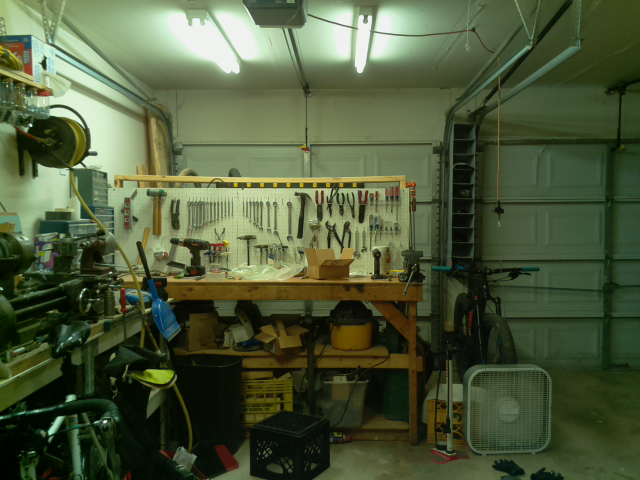

6 0  3.42 seconds


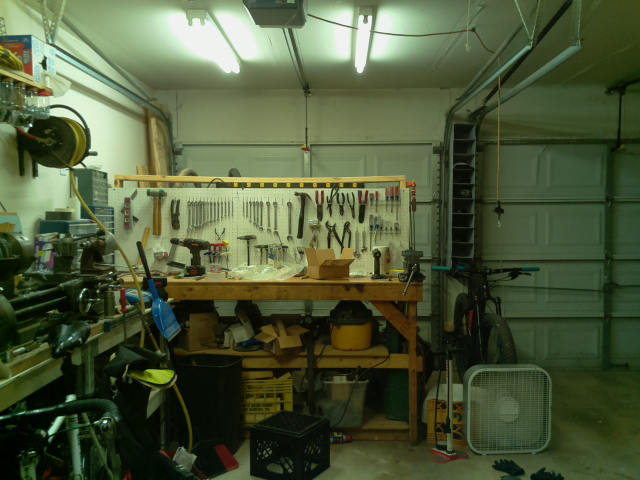

7 0  3.38 seconds


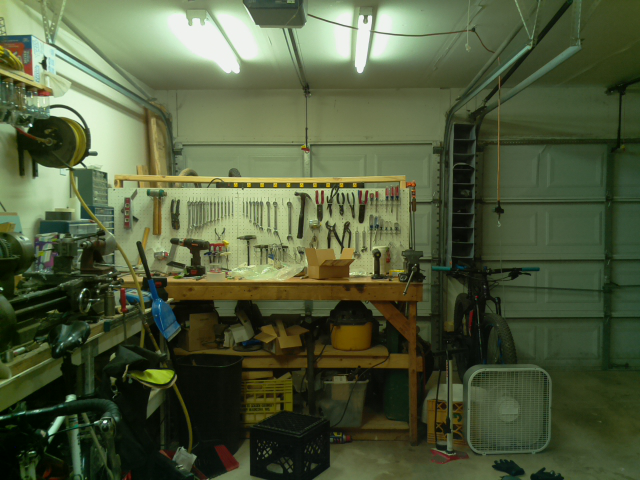

8 0  3.43 seconds


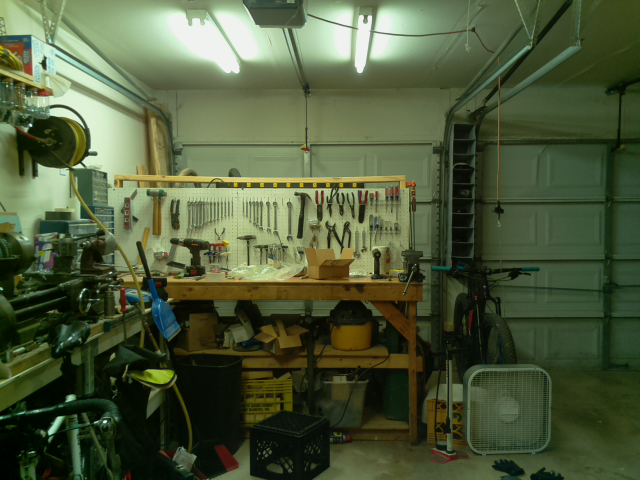

9 0  3.43 seconds


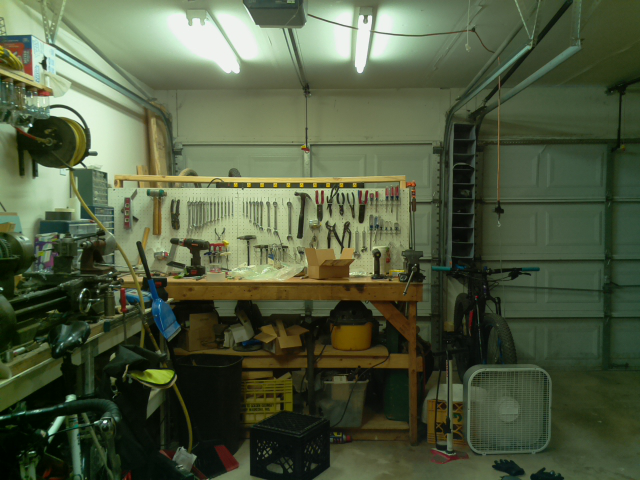

10 0  3.38 seconds


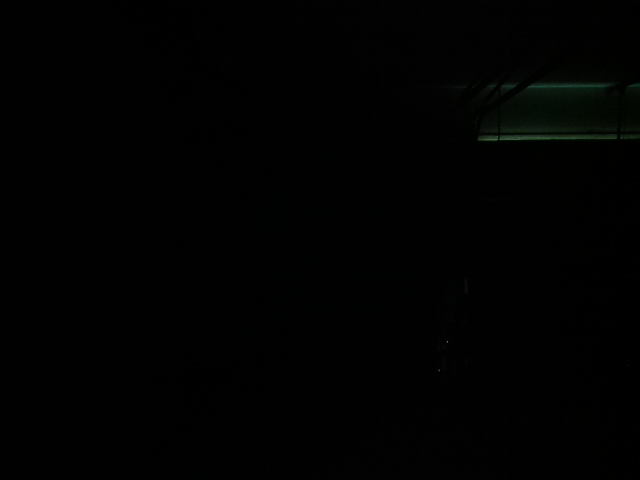

11 0  3.23 seconds


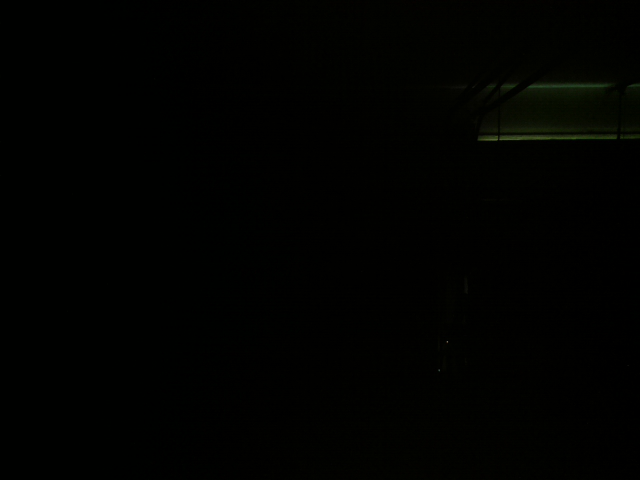

12 0  3.25 seconds


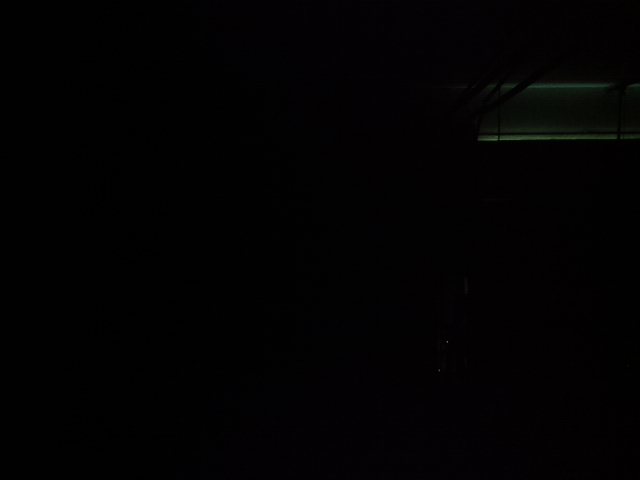

13 0  3.31 seconds


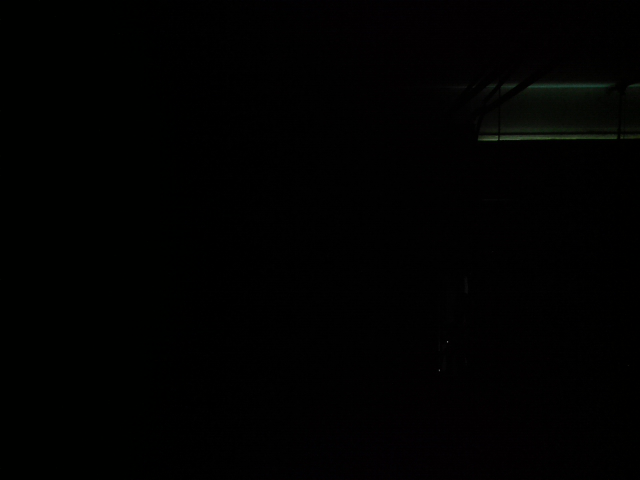

14 0  3.27 seconds


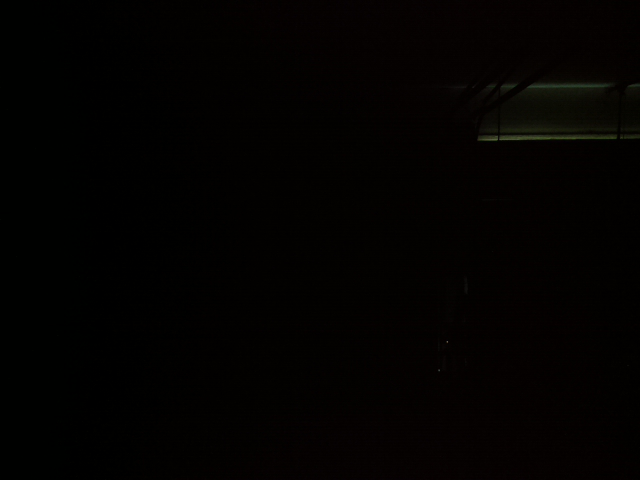

15 0  3.28 seconds


KeyboardInterrupt: 

In [13]:
test_run()

In [17]:
%lprun -f run run()

0 0
1 0
2 0
